Se importan las librerias y se leen los documentos que se entrega por el minciencia (DP1 y DP29)

In [1]:
import pandas as pd
import seaborn as sns
Datos = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto29/Cuarentenas-Totales.csv",sep=",")
Poblacion = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_std.csv",sep=",")

Se limpian las columnas innecesarias y se verifica el formato de las variables

In [2]:
Datos1 = Datos.drop(["ID","Superficie en m2","Perímetro en m","Detalle","n_REGION","Alcance","Estado"], axis=1)
Datos1.info()
Datos1['Inicio'] = pd.to_datetime(Datos1['Fecha de Inicio'])
Datos1['Fin'] = pd.to_datetime(Datos1['Fecha de Término'])
Datos1 = Datos1.drop(["Fecha de Inicio","Fecha de Término"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nombre             187 non-null    object
 1   Fecha de Inicio    187 non-null    object
 2   Fecha de Término   187 non-null    object
 3   Código CUT Comuna  187 non-null    int64 
 4   Region             187 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 7.4+ KB


In [3]:
Datos1.isna().sum()

Nombre               0
Código CUT Comuna    0
Region               0
Inicio               0
Fin                  0
dtype: int64

In [4]:
Datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Nombre             187 non-null    object        
 1   Código CUT Comuna  187 non-null    int64         
 2   Region             187 non-null    int64         
 3   Inicio             187 non-null    datetime64[ns]
 4   Fin                187 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 7.4+ KB


In [5]:
Poblacion1 = Poblacion.drop(["Region","Comuna","Fecha","Casos confirmados","Codigo region"], axis=1)
Poblacion1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58644 entries, 0 to 58643
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Codigo comuna  56052 non-null  float64
 1   Poblacion      56052 non-null  float64
dtypes: float64(2)
memory usage: 916.4 KB


In [ ]:
Usando ambos DP se fusionan para poder identificar las poblaciones de cada comuna respectivamente

In [6]:
Poblacion1.drop_duplicates("Codigo comuna")
poblacion1 = Poblacion1.groupby(by="Codigo comuna").mean()

In [7]:
Datos1 = Datos1.rename(columns = {"Código CUT Comuna":"Codigo comuna"})

In [8]:
Datos1 = Datos1.merge(poblacion1, on ="Codigo comuna")

Se genera un ciclo para cada region sumando las pobaciones que se encuentran en cuarentena

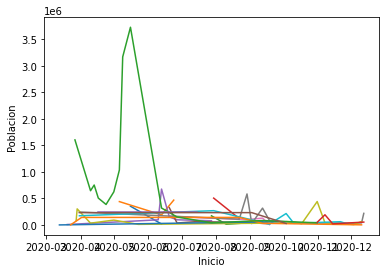

In [24]:
for i in range(Datos1["Region"].min(),(Datos1["Region"].max()+1)):
    Datos2 = Datos1[Datos1["Region"]== i]
    Datos2 = Datos2.groupby(by="Inicio").sum("Poblacion")
    sns.lineplot(x='Inicio', y='Poblacion', data=Datos2)
    